## Introduction:

After running our NUMERIC variables as a single-variate test using linear regression model, we try to improve the MSE and R^2 of the variables G1, G2, Age and Absences to predict G3 using Neural Network (linear regression).

The single variate test using linear regression is represented before every neural network mode training to ensure that the train and test set used for both the single variate test and neural network is the same.

In [754]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
sb.set() 

In [3]:
studentData = pd.read_csv('student-por.csv', sep=';') 
newStudentData = pd.DataFrame(studentData[['age','absences','G1','G2','G3']])
newStudentData.head()

,age,absences,G1,G2,G3
0,18,4,0,11,11
1,17,2,9,11,11
2,15,6,12,13,12
3,15,0,14,14,14
4,16,0,11,13,13


In [4]:
newStudentData.describe()

,age,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,3.659476,11.399076,11.570108,11.906009
std,1.218138,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,32.000000,19.000000,19.000000,19.000000


In [5]:
newStudentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       649 non-null    int64
 1   absences  649 non-null    int64
 2   G1        649 non-null    int64
 3   G2        649 non-null    int64
 4   G3        649 non-null    int64
dtypes: int64(5)
memory usage: 25.5 KB


In [6]:
linreg = LinearRegression()

In [7]:
def train_predict(X,y):
    lm = LinearRegression()
    lm.fit(X, y)
    predictions = lm.predict(X)
    # Plot our predictions
    plt.figure(figsize=(20,8))
    plt.scatter(predictions, y, s=30, c='r', marker='+')
    plt.xlabel(f"Predicted G3")
    plt.ylabel("Actual G3")
    
    mse = mean_squared_error(y, predictions)
    r2 = lm.score(X_train, y_train)
    
    print("MSE(train):", mse)
    print("R-squared(train):", r2)
    
    
    return lm.coef_,lm.intercept_

def test_predict(X,y):
    lm = LinearRegression()
    lm.fit(X, y)
    predictions = lm.predict(X)
    # Plot our predictions
    plt.figure(figsize=(20,8))
    plt.scatter(predictions, y, s=30, c='b', marker='*')
    plt.xlabel(f"Predicted G3")
    plt.ylabel("Actual G3")
    
    mse = mean_squared_error(y, predictions)
    r2 = lm.score(X_train, y_train)
    
    print("MSE(test):", mse)
    print("R-squared(test):", r2)
    
    return 

Train Set : (519, 1) (519,)
Test Set  : (130, 1) (130,)




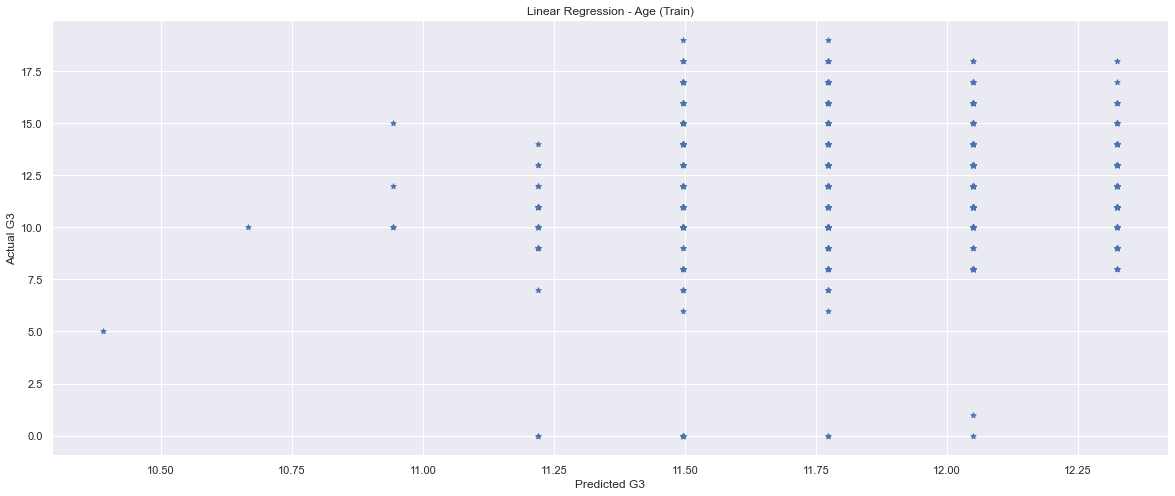



Explained Variance - R^2 (Train) 	: 0.010950601503911805
Mean Squared Error - MSE (Train) 	: 10.203797057699983
Mean Absolute Error - MAE (Train) 	: 2.3808355579196054




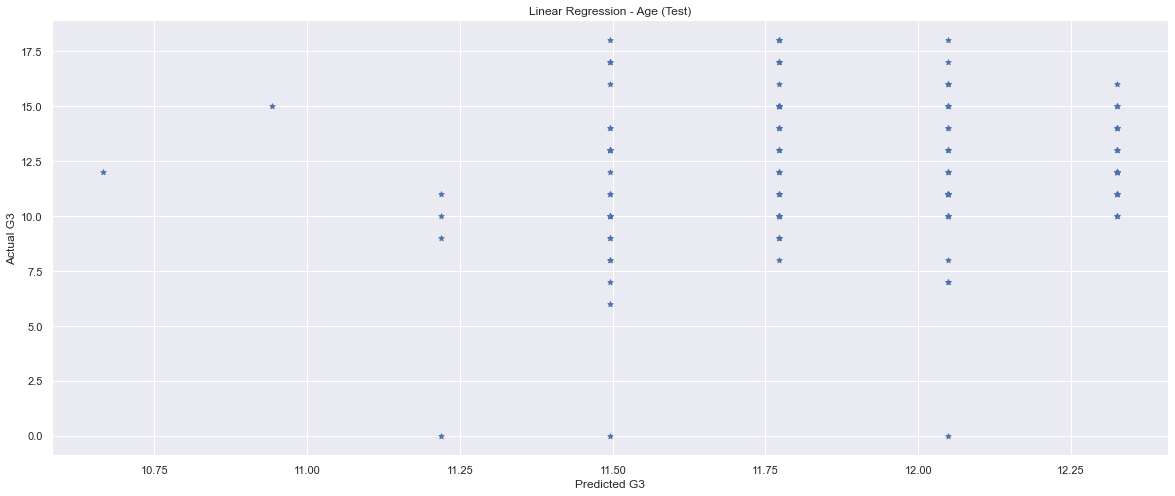

Explained Variance - R^2 (Test) 	: 0.0025577614321834474
Mean Squared Error - MSE (Test) 	: 10.71813656604462
Mean Absolute Error - MAE (Train) 	: 2.4822737628280604


In [8]:
y_age = studentData['G3']
X_age = newStudentData[['age']]

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age,test_size = 0.2)
print("Train Set :", X_train_age.shape, y_train_age.shape)
print("Test Set  :", X_test_age.shape, y_test_age.shape)
print("\n")

linreg.fit(X_train_age, y_train_age)
regline_x_age = X_train_age
regline_y_age = linreg.intercept_ + linreg.coef_ * X_train_age

y_train_pred_age = linreg.predict(X_train_age)

plt.figure(figsize=(20,8))
plt.scatter(y_train_pred_age, y_train_age, s=30, c='b', marker='*')
plt.xlabel(f"Predicted G3")
plt.ylabel("Actual G3")
plt.title("Linear Regression - Age (Train)")
plt.show()

print("\n")
print("Explained Variance - R^2 (Train) \t:", linreg.score(X_train_age, y_train_age))
print("Mean Squared Error - MSE (Train) \t:", mean_squared_error(y_train_age, y_train_pred_age))
print("Mean Absolute Error - MAE (Train) \t:", mean_absolute_error(y_train_age, y_train_pred_age))
print("\n")

y_test_pred_age = linreg.predict(X_test_age)

plt.figure(figsize=(20,8))
plt.scatter(y_test_pred_age, y_test_age, s=30, c='b', marker='*')
plt.xlabel(f"Predicted G3")
plt.ylabel("Actual G3")
plt.title("Linear Regression - Age (Test)")
plt.show()

print("Explained Variance - R^2 (Test) \t:", linreg.score(X_test_age, y_test_age))
print("Mean Squared Error - MSE (Test) \t:", mean_squared_error(y_test_age, y_test_pred_age))
print("Mean Absolute Error - MAE (Train) \t:", mean_absolute_error(y_test_age, y_test_pred_age))

Text(0.5, 1.0, 'Linear Regression - Age (Neural Network)')

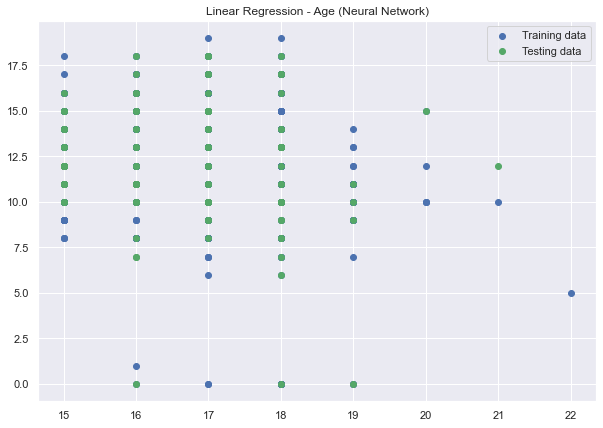

In [9]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train_age, y_train_age, c='b', label='Training data')

# Plot test data in green
plt.scatter(X_test_age, y_test_age, c='g', label='Testing data')

# Show the legend
plt.legend();

plt.title("Linear Regression - Age (Neural Network)")

In [10]:
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])# define the input_shape to our model
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2023-04-08 03:20:59.927529: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Calling summary() on our model shows us the layers it contains, the output shape and the number of parameters.

> Total params - total number of parameters in the model.

> Trainable parameters - these are the parameters (patterns) the model can update as it trains.

> Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [19]:
# Fit the model to the training data
model.fit(X_train_age, y_train_age, epochs=3000, verbose=1) # verbose controls how much gets output

Epoch 1/3000
17/17 [==============================] - 0s 1ms/step - loss: 2.4623 - mae: 2.4623
Epoch 2/3000
17/17 [==============================] - 0s 1ms/step - loss: 2.4676 - mae: 2.4676
Epoch 3/3000
17/17 [==============================] - 0s 990us/step - loss: 2.4706 - mae: 2.4706
Epoch 4/3000
17/17 [==============================] - 0s 969us/step - loss: 2.4607 - mae: 2.4607
Epoch 5/3000
17/17 [==============================] - 0s 802us/step - loss: 2.4468 - mae: 2.4468
Epoch 6/3000
17/17 [==============================] - 0s 830us/step - loss: 2.4947 - mae: 2.4947
Epoch 7/3000
17/17 [==============================] - 0s 802us/step - loss: 2.4426 - mae: 2.4426
Epoch 8/3000
17/17 [==============================] - 0s 823us/step - loss: 2.4713 - mae: 2.4713
Epoch 9/3000
17/17 [==============================] - 0s 811us/step - loss: 2.4599 - mae: 2.4599
Epoch 10/3000
17/17 [==============================] - 0s 633us/step - loss: 2.4531 - mae: 2.4531
Epoch 11/3000
17/17 [============

17/17 [==============================] - 0s 560us/step - loss: 2.4817 - mae: 2.4817
Epoch 85/3000
17/17 [==============================] - 0s 525us/step - loss: 2.4363 - mae: 2.4363
Epoch 86/3000
17/17 [==============================] - 0s 518us/step - loss: 2.5057 - mae: 2.5057
Epoch 87/3000
17/17 [==============================] - 0s 618us/step - loss: 2.4502 - mae: 2.4502
Epoch 88/3000
17/17 [==============================] - 0s 572us/step - loss: 2.5017 - mae: 2.5017
Epoch 89/3000
17/17 [==============================] - 0s 546us/step - loss: 2.4891 - mae: 2.4891
Epoch 90/3000
17/17 [==============================] - 0s 591us/step - loss: 2.4582 - mae: 2.4582
Epoch 91/3000
17/17 [==============================] - 0s 567us/step - loss: 2.4444 - mae: 2.4444
Epoch 92/3000
17/17 [==============================] - 0s 540us/step - loss: 2.4534 - mae: 2.4534
Epoch 93/3000
17/17 [==============================] - 0s 601us/step - loss: 2.4804 - mae: 2.4804
Epoch 94/3000
17/17 [=============

17/17 [==============================] - 0s 531us/step - loss: 2.4714 - mae: 2.4714
Epoch 168/3000
17/17 [==============================] - 0s 510us/step - loss: 2.4690 - mae: 2.4690
Epoch 169/3000
17/17 [==============================] - 0s 569us/step - loss: 2.4731 - mae: 2.4731
Epoch 170/3000
17/17 [==============================] - 0s 576us/step - loss: 2.4675 - mae: 2.4675
Epoch 171/3000
17/17 [==============================] - 0s 558us/step - loss: 2.4916 - mae: 2.4916
Epoch 172/3000
17/17 [==============================] - 0s 574us/step - loss: 2.4733 - mae: 2.4733
Epoch 173/3000
17/17 [==============================] - 0s 609us/step - loss: 2.4309 - mae: 2.4309
Epoch 174/3000
17/17 [==============================] - 0s 592us/step - loss: 2.4631 - mae: 2.4631
Epoch 175/3000
17/17 [==============================] - 0s 550us/step - loss: 2.4864 - mae: 2.4864
Epoch 176/3000
17/17 [==============================] - 0s 671us/step - loss: 2.4614 - mae: 2.4614
Epoch 177/3000
17/17 [===

17/17 [==============================] - 0s 593us/step - loss: 2.4528 - mae: 2.4528
Epoch 250/3000
17/17 [==============================] - 0s 503us/step - loss: 2.5040 - mae: 2.5040
Epoch 251/3000
17/17 [==============================] - 0s 504us/step - loss: 2.4623 - mae: 2.4623
Epoch 252/3000
17/17 [==============================] - 0s 604us/step - loss: 2.4481 - mae: 2.4481
Epoch 253/3000
17/17 [==============================] - 0s 569us/step - loss: 2.4499 - mae: 2.4499
Epoch 254/3000
17/17 [==============================] - 0s 544us/step - loss: 2.4626 - mae: 2.4626
Epoch 255/3000
17/17 [==============================] - 0s 585us/step - loss: 2.5244 - mae: 2.5244
Epoch 256/3000
17/17 [==============================] - 0s 543us/step - loss: 2.4567 - mae: 2.4567
Epoch 257/3000
17/17 [==============================] - 0s 544us/step - loss: 2.4695 - mae: 2.4695
Epoch 258/3000
17/17 [==============================] - 0s 553us/step - loss: 2.4982 - mae: 2.4982
Epoch 259/3000
17/17 [===

17/17 [==============================] - 0s 543us/step - loss: 2.4611 - mae: 2.4611
Epoch 332/3000
17/17 [==============================] - 0s 519us/step - loss: 2.4505 - mae: 2.4505
Epoch 333/3000
17/17 [==============================] - 0s 577us/step - loss: 2.4724 - mae: 2.4724
Epoch 334/3000
17/17 [==============================] - 0s 570us/step - loss: 2.4582 - mae: 2.4582
Epoch 335/3000
17/17 [==============================] - 0s 543us/step - loss: 2.4532 - mae: 2.4532
Epoch 336/3000
17/17 [==============================] - 0s 567us/step - loss: 2.4408 - mae: 2.4408
Epoch 337/3000
17/17 [==============================] - 0s 538us/step - loss: 2.4676 - mae: 2.4676
Epoch 338/3000
17/17 [==============================] - 0s 534us/step - loss: 2.4272 - mae: 2.4272
Epoch 339/3000
17/17 [==============================] - 0s 575us/step - loss: 2.4680 - mae: 2.4680
Epoch 340/3000
17/17 [==============================] - 0s 529us/step - loss: 2.4594 - mae: 2.4594
Epoch 341/3000
17/17 [===

17/17 [==============================] - 0s 635us/step - loss: 2.4535 - mae: 2.4535
Epoch 414/3000
17/17 [==============================] - 0s 693us/step - loss: 2.4551 - mae: 2.4551
Epoch 415/3000
17/17 [==============================] - 0s 731us/step - loss: 2.4936 - mae: 2.4936
Epoch 416/3000
17/17 [==============================] - 0s 719us/step - loss: 2.4665 - mae: 2.4665
Epoch 417/3000
17/17 [==============================] - 0s 605us/step - loss: 2.4562 - mae: 2.4562
Epoch 418/3000
17/17 [==============================] - 0s 579us/step - loss: 2.4712 - mae: 2.4712
Epoch 419/3000
17/17 [==============================] - 0s 622us/step - loss: 2.4850 - mae: 2.4850
Epoch 420/3000
17/17 [==============================] - 0s 671us/step - loss: 2.4520 - mae: 2.4520
Epoch 421/3000
17/17 [==============================] - 0s 677us/step - loss: 2.4654 - mae: 2.4654
Epoch 422/3000
17/17 [==============================] - 0s 589us/step - loss: 2.5146 - mae: 2.5146
Epoch 423/3000
17/17 [===

17/17 [==============================] - 0s 521us/step - loss: 2.4905 - mae: 2.4905
Epoch 496/3000
17/17 [==============================] - 0s 599us/step - loss: 2.4459 - mae: 2.4459
Epoch 497/3000
17/17 [==============================] - 0s 546us/step - loss: 2.4702 - mae: 2.4702
Epoch 498/3000
17/17 [==============================] - 0s 613us/step - loss: 2.5278 - mae: 2.5278
Epoch 499/3000
17/17 [==============================] - 0s 576us/step - loss: 2.4222 - mae: 2.4222
Epoch 500/3000
17/17 [==============================] - 0s 543us/step - loss: 2.4234 - mae: 2.4234
Epoch 501/3000
17/17 [==============================] - 0s 569us/step - loss: 2.4578 - mae: 2.4578
Epoch 502/3000
17/17 [==============================] - 0s 541us/step - loss: 2.4592 - mae: 2.4592
Epoch 503/3000
17/17 [==============================] - 0s 538us/step - loss: 2.4806 - mae: 2.4806
Epoch 504/3000
17/17 [==============================] - 0s 551us/step - loss: 2.4753 - mae: 2.4753
Epoch 505/3000
17/17 [===

17/17 [==============================] - 0s 530us/step - loss: 2.5086 - mae: 2.5086
Epoch 578/3000
17/17 [==============================] - 0s 519us/step - loss: 2.4384 - mae: 2.4384
Epoch 579/3000
17/17 [==============================] - 0s 555us/step - loss: 2.4793 - mae: 2.4793
Epoch 580/3000
17/17 [==============================] - 0s 549us/step - loss: 2.4573 - mae: 2.4573
Epoch 581/3000
17/17 [==============================] - 0s 593us/step - loss: 2.4472 - mae: 2.4472
Epoch 582/3000
17/17 [==============================] - 0s 553us/step - loss: 2.4939 - mae: 2.4939
Epoch 583/3000
17/17 [==============================] - 0s 534us/step - loss: 2.4629 - mae: 2.4629
Epoch 584/3000
17/17 [==============================] - 0s 600us/step - loss: 2.4476 - mae: 2.4476
Epoch 585/3000
17/17 [==============================] - 0s 542us/step - loss: 2.4695 - mae: 2.4695
Epoch 586/3000
17/17 [==============================] - 0s 560us/step - loss: 2.4401 - mae: 2.4401
Epoch 587/3000
17/17 [===

17/17 [==============================] - 0s 543us/step - loss: 2.4484 - mae: 2.4484
Epoch 660/3000
17/17 [==============================] - 0s 518us/step - loss: 2.4732 - mae: 2.4732
Epoch 661/3000
17/17 [==============================] - 0s 595us/step - loss: 2.4529 - mae: 2.4529
Epoch 662/3000
17/17 [==============================] - 0s 592us/step - loss: 2.4553 - mae: 2.4553
Epoch 663/3000
17/17 [==============================] - 0s 610us/step - loss: 2.4369 - mae: 2.4369
Epoch 664/3000
17/17 [==============================] - 0s 588us/step - loss: 2.4711 - mae: 2.4711
Epoch 665/3000
17/17 [==============================] - 0s 527us/step - loss: 2.4533 - mae: 2.4533
Epoch 666/3000
17/17 [==============================] - 0s 594us/step - loss: 2.4537 - mae: 2.4537
Epoch 667/3000
17/17 [==============================] - 0s 569us/step - loss: 2.4522 - mae: 2.4522
Epoch 668/3000
17/17 [==============================] - 0s 529us/step - loss: 2.4557 - mae: 2.4557
Epoch 669/3000
17/17 [===

17/17 [==============================] - 0s 787us/step - loss: 2.4834 - mae: 2.4834
Epoch 742/3000
17/17 [==============================] - 0s 896us/step - loss: 2.4459 - mae: 2.4459
Epoch 743/3000
17/17 [==============================] - 0s 629us/step - loss: 2.4827 - mae: 2.4827
Epoch 744/3000
17/17 [==============================] - 0s 704us/step - loss: 2.4553 - mae: 2.4553
Epoch 745/3000
17/17 [==============================] - 0s 646us/step - loss: 2.4640 - mae: 2.4640
Epoch 746/3000
17/17 [==============================] - 0s 691us/step - loss: 2.4407 - mae: 2.4407
Epoch 747/3000
17/17 [==============================] - 0s 717us/step - loss: 2.5145 - mae: 2.5145
Epoch 748/3000
17/17 [==============================] - 0s 729us/step - loss: 2.4636 - mae: 2.4636
Epoch 749/3000
17/17 [==============================] - 0s 655us/step - loss: 2.4304 - mae: 2.4304
Epoch 750/3000
17/17 [==============================] - 0s 647us/step - loss: 2.4506 - mae: 2.4506
Epoch 751/3000
17/17 [===

17/17 [==============================] - 0s 588us/step - loss: 2.5270 - mae: 2.5270
Epoch 824/3000
17/17 [==============================] - 0s 737us/step - loss: 2.4447 - mae: 2.4447
Epoch 825/3000
17/17 [==============================] - 0s 531us/step - loss: 2.4725 - mae: 2.4725
Epoch 826/3000
17/17 [==============================] - 0s 540us/step - loss: 2.4509 - mae: 2.4509
Epoch 827/3000
17/17 [==============================] - 0s 516us/step - loss: 2.4351 - mae: 2.4351
Epoch 828/3000
17/17 [==============================] - 0s 557us/step - loss: 2.4467 - mae: 2.4467
Epoch 829/3000
17/17 [==============================] - 0s 574us/step - loss: 2.4506 - mae: 2.4506
Epoch 830/3000
17/17 [==============================] - 0s 531us/step - loss: 2.5268 - mae: 2.5268
Epoch 831/3000
17/17 [==============================] - 0s 584us/step - loss: 2.4823 - mae: 2.4823
Epoch 832/3000
17/17 [==============================] - 0s 562us/step - loss: 2.4663 - mae: 2.4663
Epoch 833/3000
17/17 [===

17/17 [==============================] - 0s 524us/step - loss: 2.4890 - mae: 2.4890
Epoch 906/3000
17/17 [==============================] - 0s 560us/step - loss: 2.4356 - mae: 2.4356
Epoch 907/3000
17/17 [==============================] - 0s 519us/step - loss: 2.4592 - mae: 2.4592
Epoch 908/3000
17/17 [==============================] - 0s 597us/step - loss: 2.4853 - mae: 2.4853
Epoch 909/3000
17/17 [==============================] - 0s 668us/step - loss: 2.4643 - mae: 2.4643
Epoch 910/3000
17/17 [==============================] - 0s 550us/step - loss: 2.4366 - mae: 2.4366
Epoch 911/3000
17/17 [==============================] - 0s 479us/step - loss: 2.4414 - mae: 2.4414
Epoch 912/3000
17/17 [==============================] - 0s 576us/step - loss: 2.5769 - mae: 2.5769
Epoch 913/3000
17/17 [==============================] - 0s 685us/step - loss: 2.4499 - mae: 2.4499
Epoch 914/3000
17/17 [==============================] - 0s 535us/step - loss: 2.4499 - mae: 2.4499
Epoch 915/3000
17/17 [===

17/17 [==============================] - 0s 531us/step - loss: 2.4558 - mae: 2.4558
Epoch 988/3000
17/17 [==============================] - 0s 521us/step - loss: 2.4623 - mae: 2.4623
Epoch 989/3000
17/17 [==============================] - 0s 514us/step - loss: 2.4557 - mae: 2.4557
Epoch 990/3000
17/17 [==============================] - 0s 578us/step - loss: 2.4524 - mae: 2.4524
Epoch 991/3000
17/17 [==============================] - 0s 582us/step - loss: 2.4917 - mae: 2.4917
Epoch 992/3000
17/17 [==============================] - 0s 538us/step - loss: 2.4514 - mae: 2.4514
Epoch 993/3000
17/17 [==============================] - 0s 565us/step - loss: 2.4950 - mae: 2.4950
Epoch 994/3000
17/17 [==============================] - 0s 560us/step - loss: 2.4528 - mae: 2.4528
Epoch 995/3000
17/17 [==============================] - 0s 530us/step - loss: 2.4751 - mae: 2.4751
Epoch 996/3000
17/17 [==============================] - 0s 612us/step - loss: 2.4604 - mae: 2.4604
Epoch 997/3000
17/17 [===

17/17 [==============================] - 0s 506us/step - loss: 2.4440 - mae: 2.4440
Epoch 1070/3000
17/17 [==============================] - 0s 593us/step - loss: 2.4346 - mae: 2.4346
Epoch 1071/3000
17/17 [==============================] - 0s 566us/step - loss: 2.4321 - mae: 2.4321
Epoch 1072/3000
17/17 [==============================] - 0s 624us/step - loss: 2.4488 - mae: 2.4488
Epoch 1073/3000
17/17 [==============================] - 0s 622us/step - loss: 2.4763 - mae: 2.4763
Epoch 1074/3000
17/17 [==============================] - 0s 525us/step - loss: 2.4744 - mae: 2.4744
Epoch 1075/3000
17/17 [==============================] - 0s 553us/step - loss: 2.4470 - mae: 2.4470
Epoch 1076/3000
17/17 [==============================] - 0s 589us/step - loss: 2.4349 - mae: 2.4349
Epoch 1077/3000
17/17 [==============================] - 0s 533us/step - loss: 2.4679 - mae: 2.4679
Epoch 1078/3000
17/17 [==============================] - 0s 534us/step - loss: 2.4918 - mae: 2.4918
Epoch 1079/3000


17/17 [==============================] - 0s 588us/step - loss: 2.4973 - mae: 2.4973
Epoch 1152/3000
17/17 [==============================] - 0s 566us/step - loss: 2.4155 - mae: 2.4155
Epoch 1153/3000
17/17 [==============================] - 0s 598us/step - loss: 2.4294 - mae: 2.4294
Epoch 1154/3000
17/17 [==============================] - 0s 573us/step - loss: 2.4924 - mae: 2.4924
Epoch 1155/3000
17/17 [==============================] - 0s 543us/step - loss: 2.4427 - mae: 2.4427
Epoch 1156/3000
17/17 [==============================] - 0s 582us/step - loss: 2.4733 - mae: 2.4733
Epoch 1157/3000
17/17 [==============================] - 0s 600us/step - loss: 2.4739 - mae: 2.4739
Epoch 1158/3000
17/17 [==============================] - 0s 553us/step - loss: 2.4255 - mae: 2.4255
Epoch 1159/3000
17/17 [==============================] - 0s 603us/step - loss: 2.4382 - mae: 2.4382
Epoch 1160/3000
17/17 [==============================] - 0s 608us/step - loss: 2.4272 - mae: 2.4272
Epoch 1161/3000


17/17 [==============================] - 0s 513us/step - loss: 2.4289 - mae: 2.4289
Epoch 1234/3000
17/17 [==============================] - 0s 563us/step - loss: 2.4676 - mae: 2.4676
Epoch 1235/3000
17/17 [==============================] - 0s 528us/step - loss: 2.4615 - mae: 2.4615
Epoch 1236/3000
17/17 [==============================] - 0s 542us/step - loss: 2.4458 - mae: 2.4458
Epoch 1237/3000
17/17 [==============================] - 0s 575us/step - loss: 2.4634 - mae: 2.4634
Epoch 1238/3000
17/17 [==============================] - 0s 554us/step - loss: 2.5360 - mae: 2.5360
Epoch 1239/3000
17/17 [==============================] - 0s 539us/step - loss: 2.4370 - mae: 2.4370
Epoch 1240/3000
17/17 [==============================] - 0s 563us/step - loss: 2.4250 - mae: 2.4250
Epoch 1241/3000
17/17 [==============================] - 0s 589us/step - loss: 2.4505 - mae: 2.4505
Epoch 1242/3000
17/17 [==============================] - 0s 537us/step - loss: 2.4427 - mae: 2.4427
Epoch 1243/3000


17/17 [==============================] - 0s 513us/step - loss: 2.4536 - mae: 2.4536
Epoch 1316/3000
17/17 [==============================] - 0s 530us/step - loss: 2.4184 - mae: 2.4184
Epoch 1317/3000
17/17 [==============================] - 0s 552us/step - loss: 2.4579 - mae: 2.4579
Epoch 1318/3000
17/17 [==============================] - 0s 581us/step - loss: 2.4661 - mae: 2.4661
Epoch 1319/3000
17/17 [==============================] - 0s 538us/step - loss: 2.4726 - mae: 2.4726
Epoch 1320/3000
17/17 [==============================] - 0s 591us/step - loss: 2.4517 - mae: 2.4517
Epoch 1321/3000
17/17 [==============================] - 0s 559us/step - loss: 2.4837 - mae: 2.4837
Epoch 1322/3000
17/17 [==============================] - 0s 540us/step - loss: 2.4262 - mae: 2.4262
Epoch 1323/3000
17/17 [==============================] - 0s 608us/step - loss: 2.4401 - mae: 2.4401
Epoch 1324/3000
17/17 [==============================] - 0s 566us/step - loss: 2.4464 - mae: 2.4464
Epoch 1325/3000


17/17 [==============================] - 0s 634us/step - loss: 2.4498 - mae: 2.4498
Epoch 1398/3000
17/17 [==============================] - 0s 577us/step - loss: 2.4601 - mae: 2.4601
Epoch 1399/3000
17/17 [==============================] - 0s 623us/step - loss: 2.4406 - mae: 2.4406
Epoch 1400/3000
17/17 [==============================] - 0s 571us/step - loss: 2.4568 - mae: 2.4568
Epoch 1401/3000
17/17 [==============================] - 0s 527us/step - loss: 2.4353 - mae: 2.4353
Epoch 1402/3000
17/17 [==============================] - 0s 632us/step - loss: 2.4501 - mae: 2.4501
Epoch 1403/3000
17/17 [==============================] - 0s 597us/step - loss: 2.4608 - mae: 2.4608
Epoch 1404/3000
17/17 [==============================] - 0s 565us/step - loss: 2.4336 - mae: 2.4336
Epoch 1405/3000
17/17 [==============================] - 0s 621us/step - loss: 2.4213 - mae: 2.4213
Epoch 1406/3000
17/17 [==============================] - 0s 559us/step - loss: 2.4334 - mae: 2.4334
Epoch 1407/3000


17/17 [==============================] - 0s 522us/step - loss: 2.4523 - mae: 2.4523
Epoch 1480/3000
17/17 [==============================] - 0s 542us/step - loss: 2.4526 - mae: 2.4526
Epoch 1481/3000
17/17 [==============================] - 0s 569us/step - loss: 2.4288 - mae: 2.4288
Epoch 1482/3000
17/17 [==============================] - 0s 591us/step - loss: 2.4864 - mae: 2.4864
Epoch 1483/3000
17/17 [==============================] - 0s 554us/step - loss: 2.5036 - mae: 2.5036
Epoch 1484/3000
17/17 [==============================] - 0s 596us/step - loss: 2.4308 - mae: 2.4308
Epoch 1485/3000
17/17 [==============================] - 0s 557us/step - loss: 2.4470 - mae: 2.4470
Epoch 1486/3000
17/17 [==============================] - 0s 541us/step - loss: 2.4719 - mae: 2.4719
Epoch 1487/3000
17/17 [==============================] - 0s 584us/step - loss: 2.4653 - mae: 2.4653
Epoch 1488/3000
17/17 [==============================] - 0s 560us/step - loss: 2.4408 - mae: 2.4408
Epoch 1489/3000


17/17 [==============================] - 0s 508us/step - loss: 2.4839 - mae: 2.4839
Epoch 1562/3000
17/17 [==============================] - 0s 529us/step - loss: 2.4326 - mae: 2.4326
Epoch 1563/3000
17/17 [==============================] - 0s 545us/step - loss: 2.4452 - mae: 2.4452
Epoch 1564/3000
17/17 [==============================] - 0s 572us/step - loss: 2.4651 - mae: 2.4651
Epoch 1565/3000
17/17 [==============================] - 0s 674us/step - loss: 2.4547 - mae: 2.4547
Epoch 1566/3000
17/17 [==============================] - 0s 630us/step - loss: 2.4278 - mae: 2.4278
Epoch 1567/3000
17/17 [==============================] - 0s 633us/step - loss: 2.4243 - mae: 2.4243
Epoch 1568/3000
17/17 [==============================] - 0s 689us/step - loss: 2.4284 - mae: 2.4284
Epoch 1569/3000
17/17 [==============================] - 0s 576us/step - loss: 2.4359 - mae: 2.4359
Epoch 1570/3000
17/17 [==============================] - 0s 568us/step - loss: 2.4827 - mae: 2.4827
Epoch 1571/3000


17/17 [==============================] - 0s 537us/step - loss: 2.4253 - mae: 2.4253
Epoch 1644/3000
17/17 [==============================] - 0s 573us/step - loss: 2.4296 - mae: 2.4296
Epoch 1645/3000
17/17 [==============================] - 0s 609us/step - loss: 2.4417 - mae: 2.4417
Epoch 1646/3000
17/17 [==============================] - 0s 583us/step - loss: 2.4738 - mae: 2.4738
Epoch 1647/3000
17/17 [==============================] - 0s 536us/step - loss: 2.4374 - mae: 2.4374
Epoch 1648/3000
17/17 [==============================] - 0s 570us/step - loss: 2.4697 - mae: 2.4697
Epoch 1649/3000
17/17 [==============================] - 0s 544us/step - loss: 2.3916 - mae: 2.3916
Epoch 1650/3000
17/17 [==============================] - 0s 521us/step - loss: 2.4696 - mae: 2.4696
Epoch 1651/3000
17/17 [==============================] - 0s 566us/step - loss: 2.4317 - mae: 2.4317
Epoch 1652/3000
17/17 [==============================] - 0s 532us/step - loss: 2.4390 - mae: 2.4390
Epoch 1653/3000


17/17 [==============================] - 0s 515us/step - loss: 2.4280 - mae: 2.4280
Epoch 1726/3000
17/17 [==============================] - 0s 605us/step - loss: 2.5432 - mae: 2.5432
Epoch 1727/3000
17/17 [==============================] - 0s 571us/step - loss: 2.4760 - mae: 2.4760
Epoch 1728/3000
17/17 [==============================] - 0s 569us/step - loss: 2.4075 - mae: 2.4075
Epoch 1729/3000
17/17 [==============================] - 0s 550us/step - loss: 2.4910 - mae: 2.4910
Epoch 1730/3000
17/17 [==============================] - 0s 587us/step - loss: 2.4247 - mae: 2.4247
Epoch 1731/3000
17/17 [==============================] - 0s 570us/step - loss: 2.4925 - mae: 2.4925
Epoch 1732/3000
17/17 [==============================] - 0s 540us/step - loss: 2.4562 - mae: 2.4562
Epoch 1733/3000
17/17 [==============================] - 0s 578us/step - loss: 2.5186 - mae: 2.5186
Epoch 1734/3000
17/17 [==============================] - 0s 571us/step - loss: 2.4050 - mae: 2.4050
Epoch 1735/3000


17/17 [==============================] - 0s 543us/step - loss: 2.4253 - mae: 2.4253
Epoch 1808/3000
17/17 [==============================] - 0s 697us/step - loss: 2.4515 - mae: 2.4515
Epoch 1809/3000
17/17 [==============================] - 0s 669us/step - loss: 2.4285 - mae: 2.4285
Epoch 1810/3000
17/17 [==============================] - 0s 564us/step - loss: 2.4296 - mae: 2.4296
Epoch 1811/3000
17/17 [==============================] - 0s 596us/step - loss: 2.4415 - mae: 2.4415
Epoch 1812/3000
17/17 [==============================] - 0s 676us/step - loss: 2.4493 - mae: 2.4493
Epoch 1813/3000
17/17 [==============================] - 0s 671us/step - loss: 2.4504 - mae: 2.4504
Epoch 1814/3000
17/17 [==============================] - 0s 595us/step - loss: 2.4627 - mae: 2.4627
Epoch 1815/3000
17/17 [==============================] - 0s 581us/step - loss: 2.4255 - mae: 2.4255
Epoch 1816/3000
17/17 [==============================] - 0s 674us/step - loss: 2.4608 - mae: 2.4608
Epoch 1817/3000


17/17 [==============================] - 0s 642us/step - loss: 2.4544 - mae: 2.4544
Epoch 1890/3000
17/17 [==============================] - 0s 627us/step - loss: 2.4383 - mae: 2.4383
Epoch 1891/3000
17/17 [==============================] - 0s 633us/step - loss: 2.4616 - mae: 2.4616
Epoch 1892/3000
17/17 [==============================] - 0s 817us/step - loss: 2.4334 - mae: 2.4334
Epoch 1893/3000
17/17 [==============================] - 0s 824us/step - loss: 2.4122 - mae: 2.4122
Epoch 1894/3000
17/17 [==============================] - 0s 769us/step - loss: 2.4517 - mae: 2.4517
Epoch 1895/3000
17/17 [==============================] - 0s 758us/step - loss: 2.4630 - mae: 2.4630
Epoch 1896/3000
17/17 [==============================] - 0s 768us/step - loss: 2.4308 - mae: 2.4308
Epoch 1897/3000
17/17 [==============================] - 0s 678us/step - loss: 2.4233 - mae: 2.4233
Epoch 1898/3000
17/17 [==============================] - 0s 534us/step - loss: 2.4300 - mae: 2.4300
Epoch 1899/3000


17/17 [==============================] - 0s 554us/step - loss: 2.4362 - mae: 2.4362
Epoch 1972/3000
17/17 [==============================] - 0s 535us/step - loss: 2.4201 - mae: 2.4201
Epoch 1973/3000
17/17 [==============================] - 0s 572us/step - loss: 2.4865 - mae: 2.4865
Epoch 1974/3000
17/17 [==============================] - 0s 597us/step - loss: 2.4140 - mae: 2.4140
Epoch 1975/3000
17/17 [==============================] - 0s 540us/step - loss: 2.4706 - mae: 2.4706
Epoch 1976/3000
17/17 [==============================] - 0s 602us/step - loss: 2.4528 - mae: 2.4528
Epoch 1977/3000
17/17 [==============================] - 0s 614us/step - loss: 2.4380 - mae: 2.4380
Epoch 1978/3000
17/17 [==============================] - 0s 562us/step - loss: 2.4906 - mae: 2.4906
Epoch 1979/3000
17/17 [==============================] - 0s 541us/step - loss: 2.4558 - mae: 2.4558
Epoch 1980/3000
17/17 [==============================] - 0s 586us/step - loss: 2.4426 - mae: 2.4426
Epoch 1981/3000


17/17 [==============================] - 0s 588us/step - loss: 2.4672 - mae: 2.4672
Epoch 2054/3000
17/17 [==============================] - 0s 670us/step - loss: 2.4610 - mae: 2.4610
Epoch 2055/3000
17/17 [==============================] - 0s 558us/step - loss: 2.4434 - mae: 2.4434
Epoch 2056/3000
17/17 [==============================] - 0s 628us/step - loss: 2.3976 - mae: 2.3976
Epoch 2057/3000
17/17 [==============================] - 0s 571us/step - loss: 2.4353 - mae: 2.4353
Epoch 2058/3000
17/17 [==============================] - 0s 558us/step - loss: 2.4264 - mae: 2.4264
Epoch 2059/3000
17/17 [==============================] - 0s 574us/step - loss: 2.4938 - mae: 2.4938
Epoch 2060/3000
17/17 [==============================] - 0s 548us/step - loss: 2.4449 - mae: 2.4449
Epoch 2061/3000
17/17 [==============================] - 0s 544us/step - loss: 2.4106 - mae: 2.4106
Epoch 2062/3000
17/17 [==============================] - 0s 580us/step - loss: 2.4602 - mae: 2.4602
Epoch 2063/3000


17/17 [==============================] - 0s 492us/step - loss: 2.4460 - mae: 2.4460
Epoch 2136/3000
17/17 [==============================] - 0s 545us/step - loss: 2.4328 - mae: 2.4328
Epoch 2137/3000
17/17 [==============================] - 0s 545us/step - loss: 2.4334 - mae: 2.4334
Epoch 2138/3000
17/17 [==============================] - 0s 554us/step - loss: 2.4557 - mae: 2.4557
Epoch 2139/3000
17/17 [==============================] - 0s 577us/step - loss: 2.4432 - mae: 2.4432
Epoch 2140/3000
17/17 [==============================] - 0s 662us/step - loss: 2.4221 - mae: 2.4221
Epoch 2141/3000
17/17 [==============================] - 0s 581us/step - loss: 2.4301 - mae: 2.4301
Epoch 2142/3000
17/17 [==============================] - 0s 596us/step - loss: 2.4396 - mae: 2.4396
Epoch 2143/3000
17/17 [==============================] - 0s 549us/step - loss: 2.4684 - mae: 2.4684
Epoch 2144/3000
17/17 [==============================] - 0s 539us/step - loss: 2.4406 - mae: 2.4406
Epoch 2145/3000


17/17 [==============================] - 0s 535us/step - loss: 2.4256 - mae: 2.4256
Epoch 2218/3000
17/17 [==============================] - 0s 501us/step - loss: 2.4947 - mae: 2.4947
Epoch 2219/3000
17/17 [==============================] - 0s 582us/step - loss: 2.4841 - mae: 2.4841
Epoch 2220/3000
17/17 [==============================] - 0s 552us/step - loss: 2.4429 - mae: 2.4429
Epoch 2221/3000
17/17 [==============================] - 0s 535us/step - loss: 2.4458 - mae: 2.4458
Epoch 2222/3000
17/17 [==============================] - 0s 585us/step - loss: 2.4357 - mae: 2.4357
Epoch 2223/3000
17/17 [==============================] - 0s 548us/step - loss: 2.4411 - mae: 2.4411
Epoch 2224/3000
17/17 [==============================] - 0s 520us/step - loss: 2.4067 - mae: 2.4067
Epoch 2225/3000
17/17 [==============================] - 0s 570us/step - loss: 2.4775 - mae: 2.4775
Epoch 2226/3000
17/17 [==============================] - 0s 527us/step - loss: 2.4782 - mae: 2.4782
Epoch 2227/3000


17/17 [==============================] - 0s 578us/step - loss: 2.4083 - mae: 2.4083
Epoch 2300/3000
17/17 [==============================] - 0s 612us/step - loss: 2.4342 - mae: 2.4342
Epoch 2301/3000
17/17 [==============================] - 0s 1ms/step - loss: 2.4483 - mae: 2.4483
Epoch 2302/3000
17/17 [==============================] - 0s 2ms/step - loss: 2.4122 - mae: 2.4122
Epoch 2303/3000
17/17 [==============================] - 0s 1ms/step - loss: 2.4353 - mae: 2.4353
Epoch 2304/3000
17/17 [==============================] - 0s 1ms/step - loss: 2.4479 - mae: 2.4479
Epoch 2305/3000
17/17 [==============================] - 0s 1ms/step - loss: 2.4117 - mae: 2.4117
Epoch 2306/3000
17/17 [==============================] - 0s 952us/step - loss: 2.4199 - mae: 2.4199
Epoch 2307/3000
17/17 [==============================] - 0s 1ms/step - loss: 2.4598 - mae: 2.4598
Epoch 2308/3000
17/17 [==============================] - 0s 867us/step - loss: 2.4133 - mae: 2.4133
Epoch 2309/3000
17/17 [=====

17/17 [==============================] - 0s 769us/step - loss: 2.4614 - mae: 2.4614
Epoch 2382/3000
17/17 [==============================] - 0s 689us/step - loss: 2.4474 - mae: 2.4474
Epoch 2383/3000
17/17 [==============================] - 0s 644us/step - loss: 2.4165 - mae: 2.4165
Epoch 2384/3000
17/17 [==============================] - 0s 618us/step - loss: 2.4426 - mae: 2.4426
Epoch 2385/3000
17/17 [==============================] - 0s 542us/step - loss: 2.4509 - mae: 2.4509
Epoch 2386/3000
17/17 [==============================] - 0s 619us/step - loss: 2.4467 - mae: 2.4467
Epoch 2387/3000
17/17 [==============================] - 0s 658us/step - loss: 2.4520 - mae: 2.4520
Epoch 2388/3000
17/17 [==============================] - 0s 595us/step - loss: 2.4389 - mae: 2.4389
Epoch 2389/3000
17/17 [==============================] - 0s 595us/step - loss: 2.4560 - mae: 2.4560
Epoch 2390/3000
17/17 [==============================] - 0s 650us/step - loss: 2.4232 - mae: 2.4232
Epoch 2391/3000


17/17 [==============================] - 0s 702us/step - loss: 2.4808 - mae: 2.4808
Epoch 2464/3000
17/17 [==============================] - 0s 652us/step - loss: 2.4485 - mae: 2.4485
Epoch 2465/3000
17/17 [==============================] - 0s 702us/step - loss: 2.4012 - mae: 2.4012
Epoch 2466/3000
17/17 [==============================] - 0s 730us/step - loss: 2.4231 - mae: 2.4231
Epoch 2467/3000
17/17 [==============================] - 0s 761us/step - loss: 2.4924 - mae: 2.4924
Epoch 2468/3000
17/17 [==============================] - 0s 637us/step - loss: 2.4320 - mae: 2.4320
Epoch 2469/3000
17/17 [==============================] - 0s 678us/step - loss: 2.4774 - mae: 2.4774
Epoch 2470/3000
17/17 [==============================] - 0s 581us/step - loss: 2.4835 - mae: 2.4835
Epoch 2471/3000
17/17 [==============================] - 0s 693us/step - loss: 2.4388 - mae: 2.4388
Epoch 2472/3000
17/17 [==============================] - 0s 562us/step - loss: 2.4100 - mae: 2.4100
Epoch 2473/3000


17/17 [==============================] - 0s 699us/step - loss: 2.4415 - mae: 2.4415
Epoch 2546/3000
17/17 [==============================] - 0s 651us/step - loss: 2.4071 - mae: 2.4071
Epoch 2547/3000
17/17 [==============================] - 0s 586us/step - loss: 2.3798 - mae: 2.3798
Epoch 2548/3000
17/17 [==============================] - 0s 564us/step - loss: 2.4651 - mae: 2.4651
Epoch 2549/3000
17/17 [==============================] - 0s 547us/step - loss: 2.4086 - mae: 2.4086
Epoch 2550/3000
17/17 [==============================] - 0s 762us/step - loss: 2.4537 - mae: 2.4537
Epoch 2551/3000
17/17 [==============================] - 0s 691us/step - loss: 2.4594 - mae: 2.4594
Epoch 2552/3000
17/17 [==============================] - 0s 741us/step - loss: 2.4139 - mae: 2.4139
Epoch 2553/3000
17/17 [==============================] - 0s 649us/step - loss: 2.4434 - mae: 2.4434
Epoch 2554/3000
17/17 [==============================] - 0s 649us/step - loss: 2.4487 - mae: 2.4487
Epoch 2555/3000


17/17 [==============================] - 0s 579us/step - loss: 2.4594 - mae: 2.4594
Epoch 2628/3000
17/17 [==============================] - 0s 555us/step - loss: 2.4014 - mae: 2.4014
Epoch 2629/3000
17/17 [==============================] - 0s 565us/step - loss: 2.4596 - mae: 2.4596
Epoch 2630/3000
17/17 [==============================] - 0s 569us/step - loss: 2.4198 - mae: 2.4198
Epoch 2631/3000
17/17 [==============================] - 0s 522us/step - loss: 2.4625 - mae: 2.4625
Epoch 2632/3000
17/17 [==============================] - 0s 610us/step - loss: 2.4370 - mae: 2.4370
Epoch 2633/3000
17/17 [==============================] - 0s 531us/step - loss: 2.4703 - mae: 2.4703
Epoch 2634/3000
17/17 [==============================] - 0s 543us/step - loss: 2.4474 - mae: 2.4474
Epoch 2635/3000
17/17 [==============================] - 0s 542us/step - loss: 2.4195 - mae: 2.4195
Epoch 2636/3000
17/17 [==============================] - 0s 533us/step - loss: 2.4329 - mae: 2.4329
Epoch 2637/3000


17/17 [==============================] - 0s 516us/step - loss: 2.3924 - mae: 2.3924
Epoch 2710/3000
17/17 [==============================] - 0s 522us/step - loss: 2.5041 - mae: 2.5041
Epoch 2711/3000
17/17 [==============================] - 0s 540us/step - loss: 2.4191 - mae: 2.4191
Epoch 2712/3000
17/17 [==============================] - 0s 496us/step - loss: 2.5082 - mae: 2.5082
Epoch 2713/3000
17/17 [==============================] - 0s 585us/step - loss: 2.4580 - mae: 2.4580
Epoch 2714/3000
17/17 [==============================] - 0s 581us/step - loss: 2.4054 - mae: 2.4054
Epoch 2715/3000
17/17 [==============================] - 0s 579us/step - loss: 2.4460 - mae: 2.4460
Epoch 2716/3000
17/17 [==============================] - 0s 525us/step - loss: 2.4715 - mae: 2.4715
Epoch 2717/3000
17/17 [==============================] - 0s 611us/step - loss: 2.4475 - mae: 2.4475
Epoch 2718/3000
17/17 [==============================] - 0s 570us/step - loss: 2.5015 - mae: 2.5015
Epoch 2719/3000


17/17 [==============================] - 0s 561us/step - loss: 2.4517 - mae: 2.4517
Epoch 2792/3000
17/17 [==============================] - 0s 507us/step - loss: 2.4405 - mae: 2.4405
Epoch 2793/3000
17/17 [==============================] - 0s 628us/step - loss: 2.4750 - mae: 2.4750
Epoch 2794/3000
17/17 [==============================] - 0s 535us/step - loss: 2.4504 - mae: 2.4504
Epoch 2795/3000
17/17 [==============================] - 0s 540us/step - loss: 2.4468 - mae: 2.4468
Epoch 2796/3000
17/17 [==============================] - 0s 568us/step - loss: 2.4529 - mae: 2.4529
Epoch 2797/3000
17/17 [==============================] - 0s 532us/step - loss: 2.4206 - mae: 2.4206
Epoch 2798/3000
17/17 [==============================] - 0s 555us/step - loss: 2.4598 - mae: 2.4598
Epoch 2799/3000
17/17 [==============================] - 0s 541us/step - loss: 2.4247 - mae: 2.4247
Epoch 2800/3000
17/17 [==============================] - 0s 510us/step - loss: 2.5069 - mae: 2.5069
Epoch 2801/3000


17/17 [==============================] - 0s 533us/step - loss: 2.4432 - mae: 2.4432
Epoch 2874/3000
17/17 [==============================] - 0s 495us/step - loss: 2.4111 - mae: 2.4111
Epoch 2875/3000
17/17 [==============================] - 0s 588us/step - loss: 2.4303 - mae: 2.4303
Epoch 2876/3000
17/17 [==============================] - 0s 581us/step - loss: 2.4234 - mae: 2.4234
Epoch 2877/3000
17/17 [==============================] - 0s 644us/step - loss: 2.4605 - mae: 2.4605
Epoch 2878/3000
17/17 [==============================] - 0s 543us/step - loss: 2.4445 - mae: 2.4445
Epoch 2879/3000
17/17 [==============================] - 0s 630us/step - loss: 2.5415 - mae: 2.5415
Epoch 2880/3000
17/17 [==============================] - 0s 653us/step - loss: 2.4689 - mae: 2.4689
Epoch 2881/3000
17/17 [==============================] - 0s 655us/step - loss: 2.4364 - mae: 2.4364
Epoch 2882/3000
17/17 [==============================] - 0s 557us/step - loss: 2.4204 - mae: 2.4204
Epoch 2883/3000


17/17 [==============================] - 0s 509us/step - loss: 2.4259 - mae: 2.4259
Epoch 2956/3000
17/17 [==============================] - 0s 551us/step - loss: 2.4764 - mae: 2.4764
Epoch 2957/3000
17/17 [==============================] - 0s 548us/step - loss: 2.4079 - mae: 2.4079
Epoch 2958/3000
17/17 [==============================] - 0s 560us/step - loss: 2.4239 - mae: 2.4239
Epoch 2959/3000
17/17 [==============================] - 0s 534us/step - loss: 2.4453 - mae: 2.4453
Epoch 2960/3000
17/17 [==============================] - 0s 586us/step - loss: 2.4258 - mae: 2.4258
Epoch 2961/3000
17/17 [==============================] - 0s 558us/step - loss: 2.4195 - mae: 2.4195
Epoch 2962/3000
17/17 [==============================] - 0s 550us/step - loss: 2.4223 - mae: 2.4223
Epoch 2963/3000
17/17 [==============================] - 0s 587us/step - loss: 2.4582 - mae: 2.4582
Epoch 2964/3000
17/17 [==============================] - 0s 560us/step - loss: 2.4713 - mae: 2.4713
Epoch 2965/3000


In [20]:
# Check the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [21]:
y_test_predNN_age = model.predict(X_test_age)

5/5 [==============================] - 0s 912us/step


In [22]:
#defining functions to be used for NN evaluation

def plot_predictions(train_data=X_train_age, 
                     train_labels=y_train_age, 
                     test_data=X_test_age, 
                     test_labels=y_test_age, 
                     predictions=y_test_predNN_age):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();
    
def mae(y_test_age, y_test_pred_age):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test_age,
                                        y_test_pred_age)
  
def mse(y_test_age, y_test_pred_age):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test_age,
                                       y_test_pred_age)

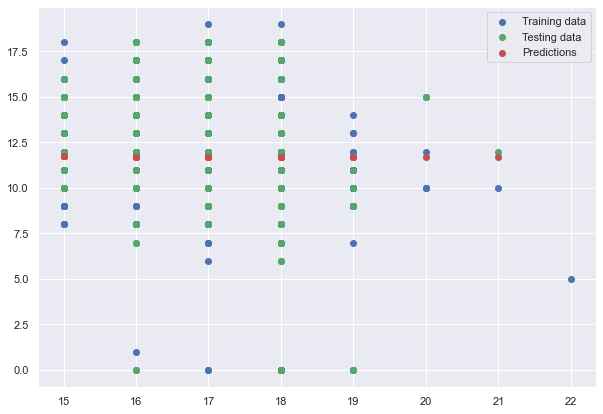

In [23]:
plot_predictions(train_data=X_train_age,
                 train_labels=y_train_age,
                 test_data=X_test_age,
                 test_labels=y_test_age,
                 predictions=y_test_predNN_age)

In [24]:
# Evaluate the model on the test set

mae_age = mae(y_test_age, y_test_predNN_age.squeeze()).numpy()
mse_age = mse(y_test_age, y_test_predNN_age.squeeze()).numpy()
print("Mean Squared Error - MSE (Neural Network - Test) \t:", mse_age)
print("Mean Absolute Error - MAE (Neural Network - Test) \t:", mae_age)

Mean Squared Error - MSE (Neural Network - Test) 	: 10.9545145
Mean Absolute Error - MAE (Neural Network - Test) 	: 2.497092


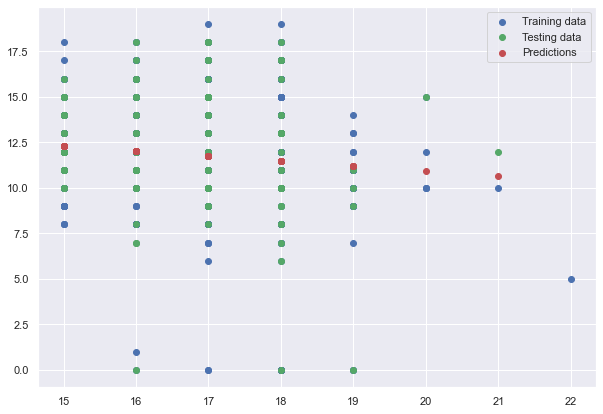

In [17]:
y_test_pred_age = linreg.predict(X_test_age)
plot_predictions(train_data=X_train_age,
                 train_labels=y_train_age,
                 test_data=X_test_age,
                 test_labels=y_test_age,
                 predictions=y_test_pred_age)

# Absences

Train Set : (519, 1) (519,)
Test Set  : (130, 1) (130,)




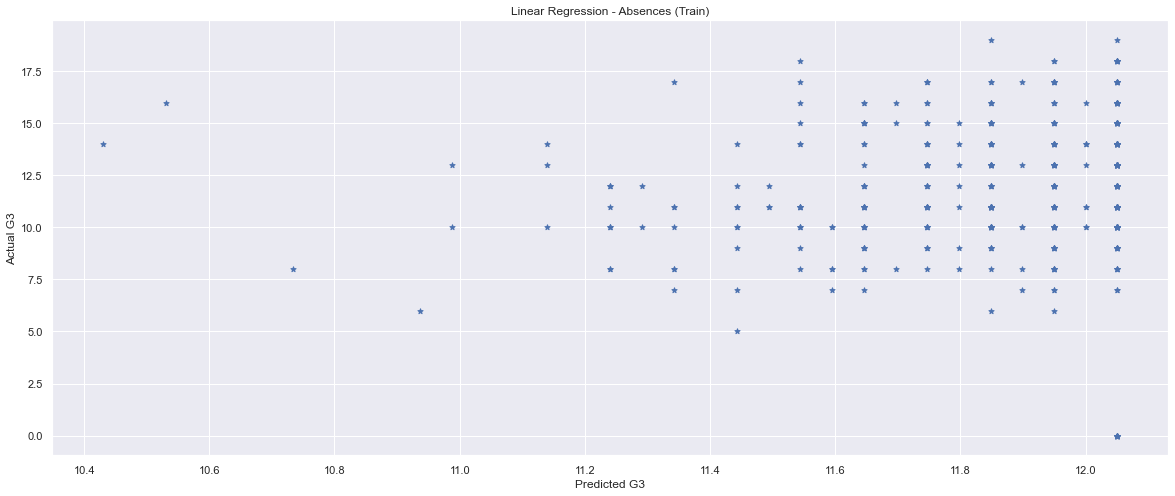



Explained Variance - R^2 (Train) 	: 0.00515727233310137
Mean Squared Error - MSE (Train) 	: 10.808245055361185
Mean Absolute Error - MAE (Train) 	: 2.429204728654862




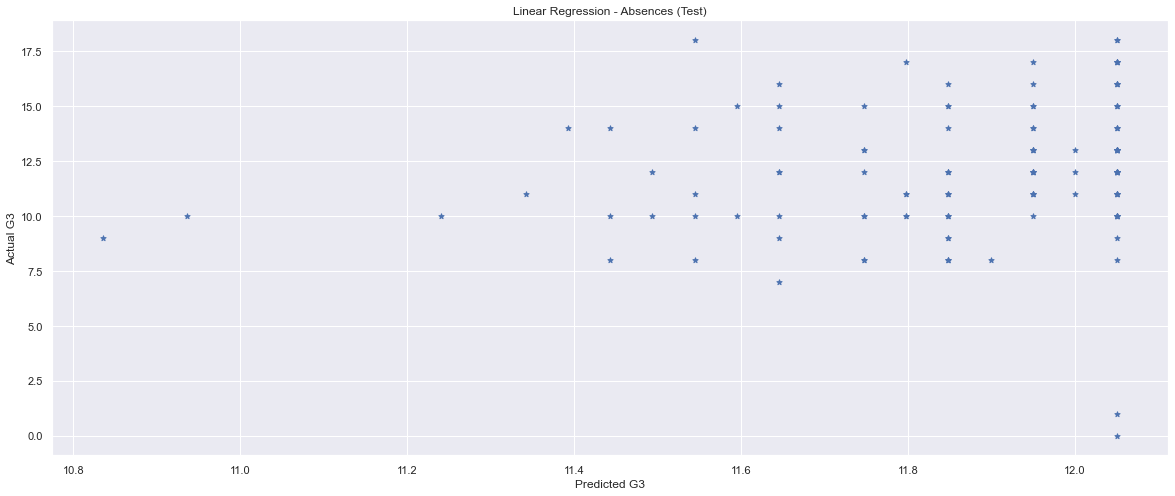

Explained Variance - R^2 (Test) 	: 0.01755230586734091
Mean Squared Error - MSE (Test) 	: 8.467013266433591
Mean Absolute Error - MAE (Test) 	: 2.1595763276788498


In [97]:
y_absences = studentData['G3']
X_absences= newStudentData[['absences']]

X_train_absences, X_test_absences, y_train_absences, y_test_absences = train_test_split(X_absences, y_absences,test_size = 0.2)
print("Train Set :", X_train_absences.shape, y_train_absences.shape)
print("Test Set  :", X_test_absences.shape, y_test_absences.shape)
print("\n")

linreg.fit(X_train_absences, y_train_absences)
regline_x_absences = X_train_absences
regline_y_absences = linreg.intercept_ + linreg.coef_ * X_train_absences

y_train_pred_absences = linreg.predict(X_train_absences)

plt.figure(figsize=(20,8))
plt.scatter(y_train_pred_absences, y_train_absences, s=30, c='b', marker='*')
plt.xlabel(f"Predicted G3")
plt.ylabel("Actual G3")
plt.title("Linear Regression - Absences (Train)")
plt.show()

print("\n")
print("Explained Variance - R^2 (Train) \t:", linreg.score(X_train_absences, y_train_absences))
print("Mean Squared Error - MSE (Train) \t:", mean_squared_error(y_train_absences, y_train_pred_absences))
print("Mean Absolute Error - MAE (Train) \t:", mean_absolute_error(y_train_absences, y_train_pred_absences))
print("\n")

y_test_pred_absences = linreg.predict(X_test_absences)

plt.figure(figsize=(20,8))
plt.scatter(y_test_pred_absences, y_test_absences, s=30, c='b', marker='*')
plt.xlabel(f"Predicted G3")
plt.ylabel("Actual G3")
plt.title("Linear Regression - Absences (Test)")
plt.show()

print("Explained Variance - R^2 (Test) \t:", linreg.score(X_test_absences, y_test_absences))
print("Mean Squared Error - MSE (Test) \t:", mean_squared_error(y_test_absences, y_test_pred_absences))
print("Mean Absolute Error - MAE (Test) \t:", mean_absolute_error(y_test_absences, y_test_pred_absences))

Text(0.5, 1.0, 'Linear Regression - Absences (Neural Network)')

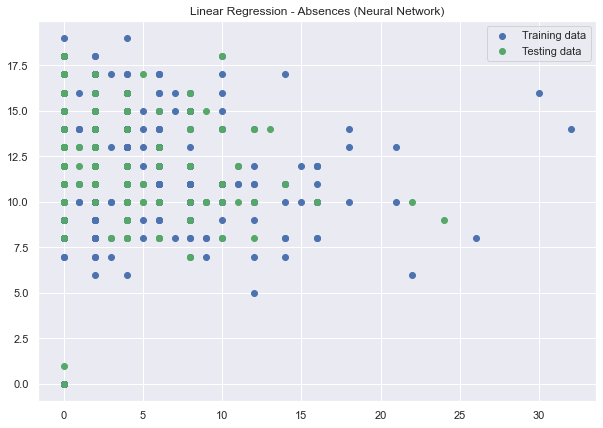

In [98]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train_absences, y_train_absences, c='b', label='Training data')

# Plot test data in green
plt.scatter(X_test_absences, y_test_absences, c='g', label='Testing data')

# Show the legend
plt.legend();

plt.title("Linear Regression - Absences (Neural Network)")

In [99]:
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(1, input_shape=[1])# define the input_shape to our model
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
 dense_12 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [100]:
# Fit the model to the training data
model.fit(X_train_absences, y_train_absences, epochs=277, verbose=1) # verbose controls how much gets output

Epoch 1/277
17/17 [==============================] - 0s 614us/step - loss: 9.7095 - mae: 9.7095
Epoch 2/277
17/17 [==============================] - 0s 666us/step - loss: 8.6547 - mae: 8.6547
Epoch 3/277
17/17 [==============================] - 0s 627us/step - loss: 8.3600 - mae: 8.3600
Epoch 4/277
17/17 [==============================] - 0s 635us/step - loss: 8.1701 - mae: 8.1701
Epoch 5/277
17/17 [==============================] - 0s 660us/step - loss: 8.0088 - mae: 8.0088
Epoch 6/277
17/17 [==============================] - 0s 621us/step - loss: 7.8051 - mae: 7.8051
Epoch 7/277
17/17 [==============================] - 0s 558us/step - loss: 7.6145 - mae: 7.6145
Epoch 8/277
17/17 [==============================] - 0s 600us/step - loss: 7.3954 - mae: 7.3954
Epoch 9/277
17/17 [==============================] - 0s 602us/step - loss: 7.1683 - mae: 7.1683
Epoch 10/277
17/17 [==============================] - 0s 581us/step - loss: 6.8854 - mae: 6.8854
Epoch 11/277
17/17 [===================

17/17 [==============================] - 0s 601us/step - loss: 2.4446 - mae: 2.4446
Epoch 86/277
17/17 [==============================] - 0s 529us/step - loss: 2.4925 - mae: 2.4925
Epoch 87/277
17/17 [==============================] - 0s 523us/step - loss: 2.4775 - mae: 2.4775
Epoch 88/277
17/17 [==============================] - 0s 553us/step - loss: 2.4810 - mae: 2.4810
Epoch 89/277
17/17 [==============================] - 0s 560us/step - loss: 2.4563 - mae: 2.4563
Epoch 90/277
17/17 [==============================] - 0s 545us/step - loss: 2.4961 - mae: 2.4961
Epoch 91/277
17/17 [==============================] - 0s 588us/step - loss: 2.4463 - mae: 2.4463
Epoch 92/277
17/17 [==============================] - 0s 568us/step - loss: 2.4639 - mae: 2.4639
Epoch 93/277
17/17 [==============================] - 0s 541us/step - loss: 2.4248 - mae: 2.4248
Epoch 94/277
17/17 [==============================] - 0s 576us/step - loss: 2.4548 - mae: 2.4548
Epoch 95/277
17/17 [=======================

17/17 [==============================] - 0s 582us/step - loss: 2.4629 - mae: 2.4629
Epoch 169/277
17/17 [==============================] - 0s 555us/step - loss: 2.4525 - mae: 2.4525
Epoch 170/277
17/17 [==============================] - 0s 547us/step - loss: 2.4742 - mae: 2.4742
Epoch 171/277
17/17 [==============================] - 0s 605us/step - loss: 2.4865 - mae: 2.4865
Epoch 172/277
17/17 [==============================] - 0s 625us/step - loss: 2.4816 - mae: 2.4816
Epoch 173/277
17/17 [==============================] - 0s 523us/step - loss: 2.4276 - mae: 2.4276
Epoch 174/277
17/17 [==============================] - 0s 474us/step - loss: 2.5165 - mae: 2.5165
Epoch 175/277
17/17 [==============================] - 0s 469us/step - loss: 2.4537 - mae: 2.4537
Epoch 176/277
17/17 [==============================] - 0s 461us/step - loss: 2.4602 - mae: 2.4602
Epoch 177/277
17/17 [==============================] - 0s 492us/step - loss: 2.4779 - mae: 2.4779
Epoch 178/277
17/17 [=============

17/17 [==============================] - 0s 564us/step - loss: 2.4722 - mae: 2.4722
Epoch 252/277
17/17 [==============================] - 0s 619us/step - loss: 2.4304 - mae: 2.4304
Epoch 253/277
17/17 [==============================] - 0s 597us/step - loss: 2.4820 - mae: 2.4820
Epoch 254/277
17/17 [==============================] - 0s 566us/step - loss: 2.4718 - mae: 2.4718
Epoch 255/277
17/17 [==============================] - 0s 639us/step - loss: 2.4732 - mae: 2.4732
Epoch 256/277
17/17 [==============================] - 0s 584us/step - loss: 2.4669 - mae: 2.4669
Epoch 257/277
17/17 [==============================] - 0s 552us/step - loss: 2.4539 - mae: 2.4539
Epoch 258/277
17/17 [==============================] - 0s 629us/step - loss: 2.4559 - mae: 2.4559
Epoch 259/277
17/17 [==============================] - 0s 637us/step - loss: 2.4581 - mae: 2.4581
Epoch 260/277
17/17 [==============================] - 0s 566us/step - loss: 2.4422 - mae: 2.4422
Epoch 261/277
17/17 [=============

In [108]:
y_test_predNN_absences = model.predict(X_test_absences)

5/5 [==============================] - 0s 968us/step


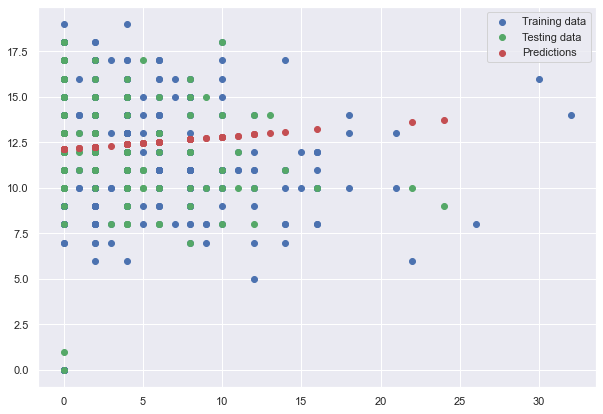

In [102]:
plot_predictions(train_data=X_train_absences,
                 train_labels=y_train_absences,
                 test_data=X_test_absences,
                 test_labels=y_test_absences,
                 predictions=y_test_predNN_absences)

In [103]:
# Evaluate the model on the test set

mae_absences = mae(y_test_absences, y_test_predNN_absences.squeeze()).numpy()
mse_absences = mse(y_test_absences, y_test_predNN_absences.squeeze()).numpy()
print("Mean Squared Error - MSE (Neural Network - Test) \t:", mse_absences)
print("Mean Absolute Error - MAE (Neural Network - Test) \t:", mae_absences)

Mean Squared Error - MSE (Neural Network - Test) 	: 9.129753
Mean Absolute Error - MAE (Neural Network - Test) 	: 2.3167882


# G1

Train Set : (519, 1) (519,)
Test Set  : (130, 1) (130,)




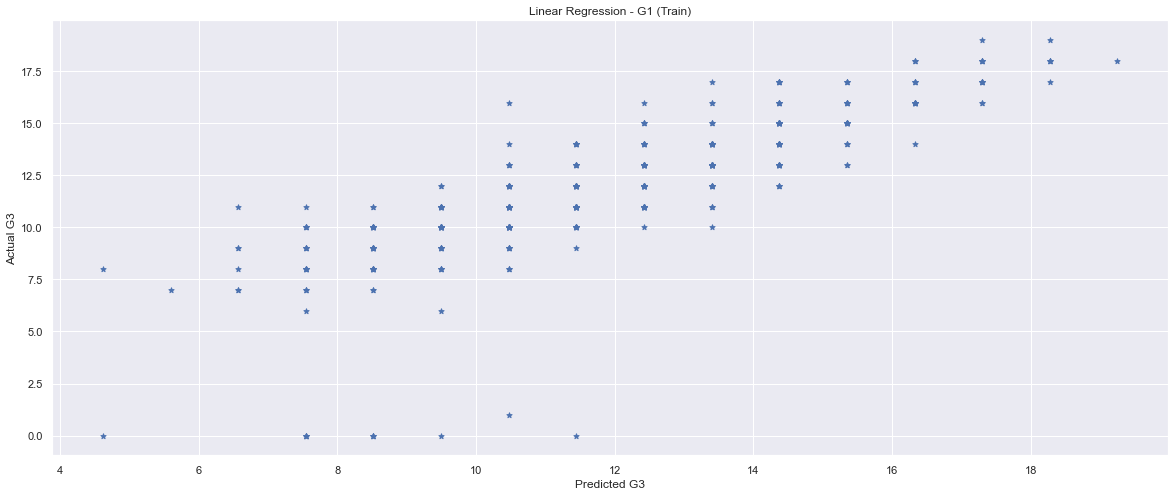



Explained Variance - R^2 (Train) 	: 0.6751623323073379
Mean Squared Error - MSE (Train) 	: 3.3592667954652207
Mean Absolute Error - MAE (Train) 	: 1.2068733358122181




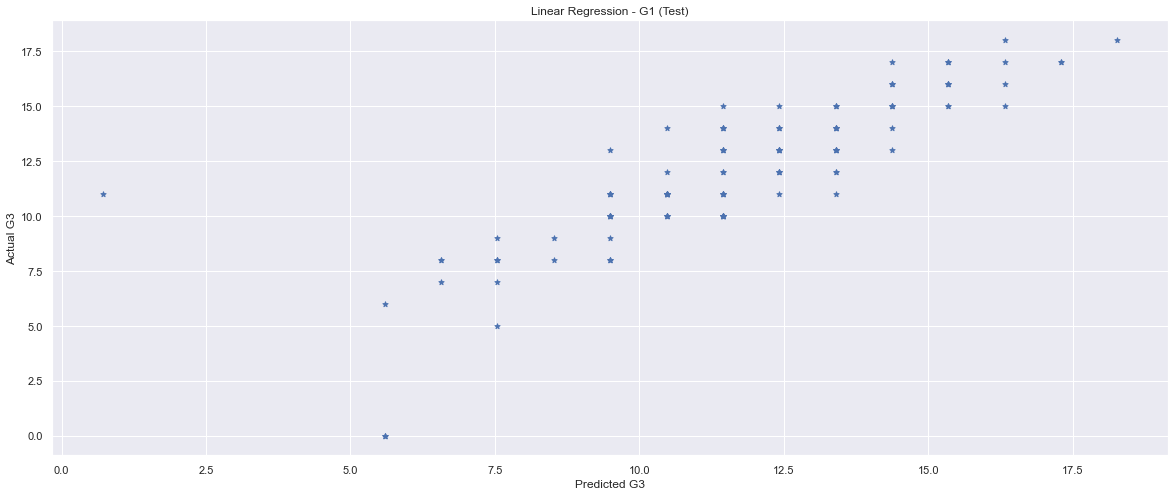

Explained Variance - R^2 (Test) 	: 0.7104515051907709
Mean Squared Error - MSE (Test) 	: 3.108688585335252
Mean Absolute Error - MAE (Test) 	: 1.215458995430206


In [187]:
y_G1 = studentData['G3']
X_G1= newStudentData[['G1']]

X_train_G1, X_test_G1, y_train_G1, y_test_G1 = train_test_split(X_G1, y_G1,test_size = 0.2)
print("Train Set :", X_train_G1.shape, y_train_G1.shape)
print("Test Set  :", X_test_G1.shape, y_test_G1.shape)
print("\n")

linreg.fit(X_train_G1, y_train_G1)
regline_x_G1 = X_train_G1
regline_y_G1 = linreg.intercept_ + linreg.coef_ * X_train_G1

y_train_pred_G1 = linreg.predict(X_train_G1)

plt.figure(figsize=(20,8))
plt.scatter(y_train_pred_G1, y_train_G1, s=30, c='b', marker='*')
plt.xlabel(f"Predicted G3")
plt.ylabel("Actual G3")
plt.title("Linear Regression - G1 (Train)")
plt.show()

print("\n")
print("Explained Variance - R^2 (Train) \t:", linreg.score(X_train_G1, y_train_G1))
print("Mean Squared Error - MSE (Train) \t:", mean_squared_error(y_train_G1, y_train_pred_G1))
print("Mean Absolute Error - MAE (Train) \t:", mean_absolute_error(y_train_G1, y_train_pred_G1))
print("\n")

y_test_pred_G1 = linreg.predict(X_test_G1)

plt.figure(figsize=(20,8))
plt.scatter(y_test_pred_G1, y_test_G1, s=30, c='b', marker='*')
plt.xlabel(f"Predicted G3")
plt.ylabel("Actual G3")
plt.title("Linear Regression - G1 (Test)")
plt.show()

print("Explained Variance - R^2 (Test) \t:", linreg.score(X_test_G1, y_test_G1))
print("Mean Squared Error - MSE (Test) \t:", mean_squared_error(y_test_G1, y_test_pred_G1))
print("Mean Absolute Error - MAE (Test) \t:", mean_absolute_error(y_test_G1, y_test_pred_G1))

Text(0.5, 1.0, 'Linear Regression - G1 (Neural Network)')

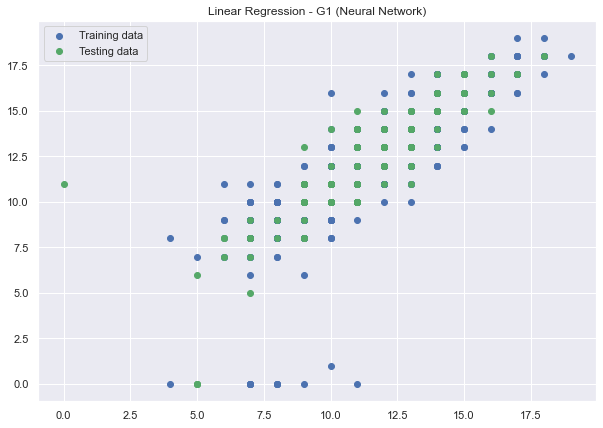

In [188]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train_G1, y_train_G1, c='b', label='Training data')

# Plot test data in green
plt.scatter(X_test_G1, y_test_G1, c='g', label='Testing data')

# Show the legend
plt.legend();

plt.title("Linear Regression - G1 (Neural Network)")

In [189]:
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(1, input_shape=[1])# define the input_shape to our model
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 1)                 2         
                                                                 
 dense_40 (Dense)            (None, 1)                 2         
                                                                 
 dense_41 (Dense)            (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [190]:
# Fit the model to the training data
model.fit(X_train_G1, y_train_G1, epochs=45, verbose=1) # verbose controls how much gets output

Epoch 1/45
17/17 [==============================] - 0s 681us/step - loss: 3.0089 - mae: 3.0089
Epoch 2/45
17/17 [==============================] - 0s 721us/step - loss: 1.8445 - mae: 1.8445
Epoch 3/45
17/17 [==============================] - 0s 687us/step - loss: 2.0925 - mae: 2.0925
Epoch 4/45
17/17 [==============================] - 0s 613us/step - loss: 1.7946 - mae: 1.7946
Epoch 5/45
17/17 [==============================] - 0s 676us/step - loss: 1.7908 - mae: 1.7908
Epoch 6/45
17/17 [==============================] - 0s 660us/step - loss: 1.7854 - mae: 1.7854
Epoch 7/45
17/17 [==============================] - 0s 573us/step - loss: 1.7505 - mae: 1.7505
Epoch 8/45
17/17 [==============================] - 0s 567us/step - loss: 1.4234 - mae: 1.4234
Epoch 9/45
17/17 [==============================] - 0s 645us/step - loss: 1.9103 - mae: 1.9103
Epoch 10/45
17/17 [==============================] - 0s 593us/step - loss: 1.9145 - mae: 1.9145
Epoch 11/45
17/17 [==============================

5/5 [==============================] - 0s 836us/step


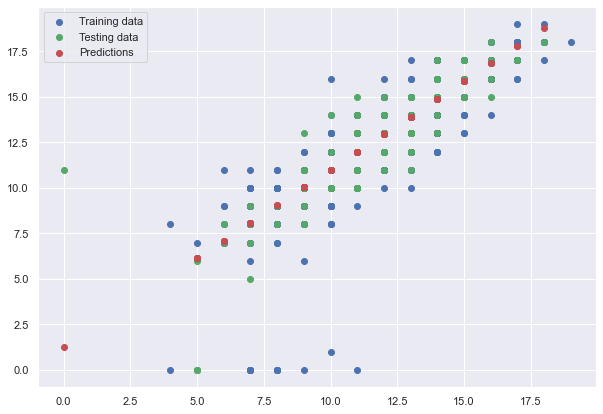

In [191]:
y_test_predNN_G1 = model.predict(X_test_G1)

plot_predictions(train_data=X_train_G1,
                 train_labels=y_train_G1,
                 test_data=X_test_G1,
                 test_labels=y_test_G1,
                 predictions=y_test_predNN_G1)

In [192]:
# Evaluate the model on the test set

mae_G1 = mae(y_test_G1, y_test_predNN_G1.squeeze()).numpy()
mse_G1 = mse(y_test_G1, y_test_predNN_G1.squeeze()).numpy()
print("Mean Squared Error - MSE (Neural Network - Test) \t:", mse_G1)
print("Mean Absolute Error - MAE (Neural Network - Test) \t:", mae_G1)

Mean Squared Error - MSE (Neural Network - Test) 	: 3.0266092
Mean Absolute Error - MAE (Neural Network - Test) 	: 1.1053861


Train Set : (519, 1) (519,)
Test Set  : (130, 1) (130,)




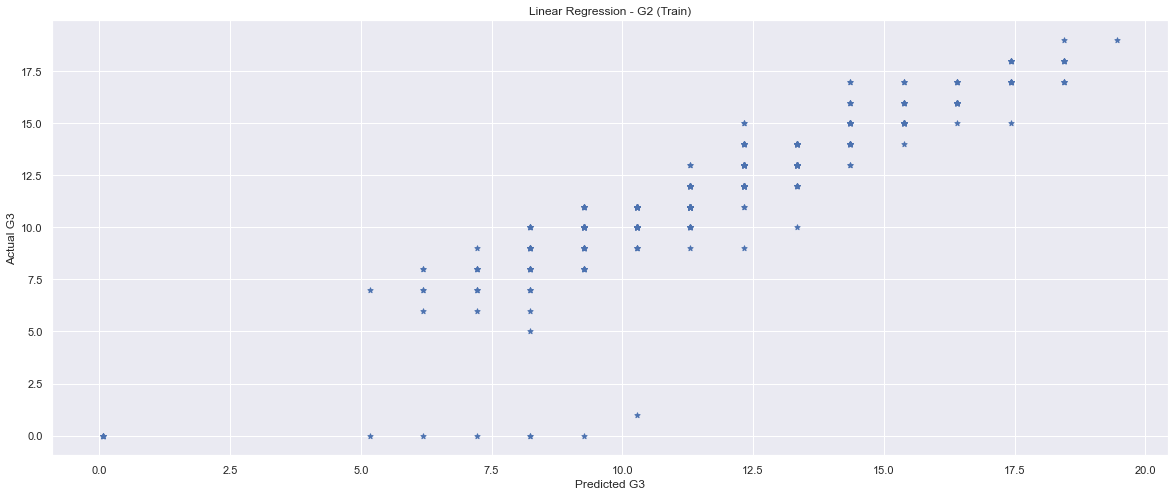



Explained Variance - R^2 (Train) 	: 0.8538665708845483
Mean Squared Error - MSE (Train) 	: 1.5411236284634353
Mean Absolute Error - MAE (Train) 	: 0.7805506291954254




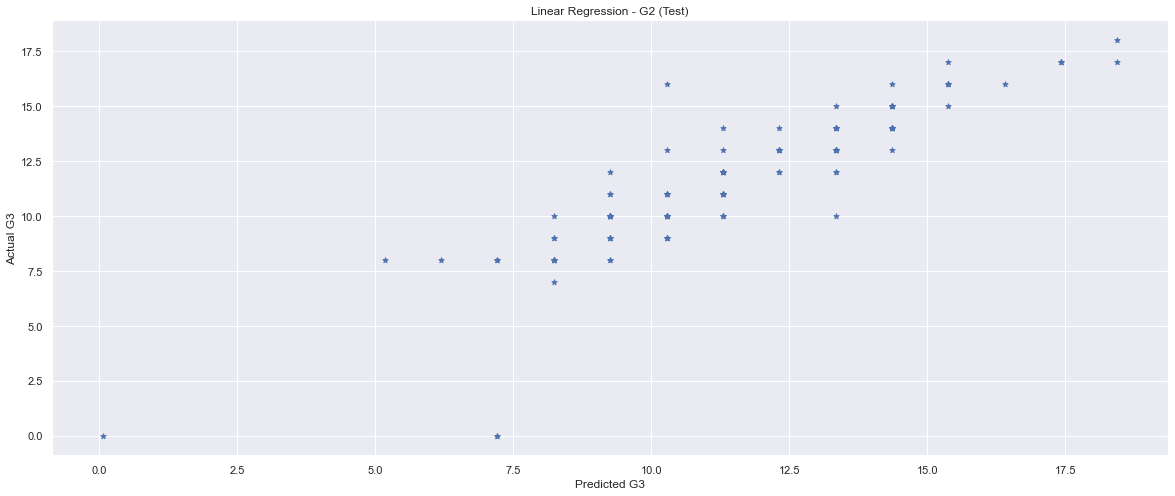

Explained Variance - R^2 (Test) 	: 0.7989956383063538
Mean Squared Error - MSE (Test) 	: 1.9803211376540704
Mean Absolute Error - MAE (Test) 	: 0.9084860083306237


In [748]:
y_G2 = studentData['G3']
X_G2= newStudentData[['G2']]

X_train_G2, X_test_G2, y_train_G2, y_test_G2 = train_test_split(X_G2, y_G2,test_size = 0.2)
print("Train Set :", X_train_G2.shape, y_train_G2.shape)
print("Test Set  :", X_test_G2.shape, y_test_G2.shape)
print("\n")

linreg.fit(X_train_G2, y_train_G2)
regline_x_G2 = X_train_G2
regline_y_G2 = linreg.intercept_ + linreg.coef_ * X_train_G2

y_train_pred_G2 = linreg.predict(X_train_G2)

plt.figure(figsize=(20,8))
plt.scatter(y_train_pred_G2, y_train_G2, s=30, c='b', marker='*')
plt.xlabel(f"Predicted G3")
plt.ylabel("Actual G3")
plt.title("Linear Regression - G2 (Train)")
plt.show()

print("\n")
print("Explained Variance - R^2 (Train) \t:", linreg.score(X_train_G2, y_train_G2))
print("Mean Squared Error - MSE (Train) \t:", mean_squared_error(y_train_G2, y_train_pred_G2))
print("Mean Absolute Error - MAE (Train) \t:", mean_absolute_error(y_train_G2, y_train_pred_G2))
print("\n")

y_test_pred_G2 = linreg.predict(X_test_G2)

plt.figure(figsize=(20,8))
plt.scatter(y_test_pred_G2, y_test_G2, s=30, c='b', marker='*')
plt.xlabel(f"Predicted G3")
plt.ylabel("Actual G3")
plt.title("Linear Regression - G2 (Test)")
plt.show()

print("Explained Variance - R^2 (Test) \t:", linreg.score(X_test_G2, y_test_G2))
print("Mean Squared Error - MSE (Test) \t:", mean_squared_error(y_test_G2, y_test_pred_G2))
print("Mean Absolute Error - MAE (Test) \t:", mean_absolute_error(y_test_G2, y_test_pred_G2))

Text(0.5, 1.0, 'Linear Regression - G2 (Neural Network)')

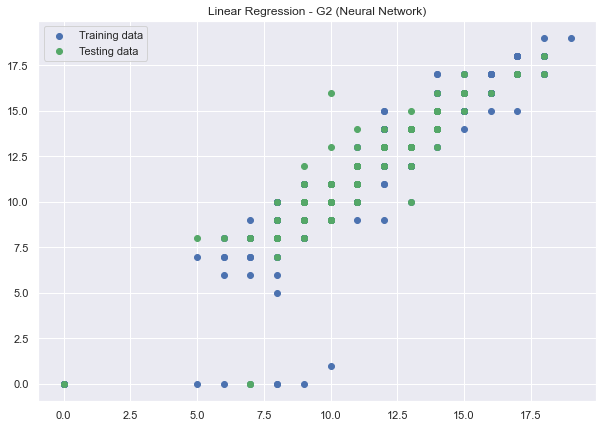

In [749]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train_G2, y_train_G2, c='b', label='Training data')

# Plot test data in green
plt.scatter(X_test_G2, y_test_G2, c='g', label='Testing data')

# Show the legend
plt.legend();

plt.title("Linear Regression - G2 (Neural Network)")

In [750]:
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1, input_shape=[1])# define the input_shape to our model
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

Model: "sequential_114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_321 (Dense)           (None, 10)                20        
                                                                 
 dense_322 (Dense)           (None, 10)                110       
                                                                 
 dense_323 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [751]:
# Fit the model to the training data
model.fit(X_train_G2, y_train_G2, epochs=55, verbose=1) # verbose controls how much gets output

Epoch 1/55
17/17 [==============================] - 0s 671us/step - loss: 4.3734 - mae: 4.3734
Epoch 2/55
17/17 [==============================] - 0s 776us/step - loss: 2.6005 - mae: 2.6005
Epoch 3/55
17/17 [==============================] - 0s 667us/step - loss: 2.3425 - mae: 2.3425
Epoch 4/55
17/17 [==============================] - 0s 651us/step - loss: 2.2366 - mae: 2.2366
Epoch 5/55
17/17 [==============================] - 0s 699us/step - loss: 2.2444 - mae: 2.2444
Epoch 6/55
17/17 [==============================] - 0s 695us/step - loss: 1.9292 - mae: 1.9292
Epoch 7/55
17/17 [==============================] - 0s 693us/step - loss: 2.0848 - mae: 2.0848
Epoch 8/55
17/17 [==============================] - 0s 656us/step - loss: 1.8970 - mae: 1.8970
Epoch 9/55
17/17 [==============================] - 0s 674us/step - loss: 2.0501 - mae: 2.0501
Epoch 10/55
17/17 [==============================] - 0s 641us/step - loss: 1.8529 - mae: 1.8529
Epoch 11/55
17/17 [==============================

5/5 [==============================] - 0s 915us/step


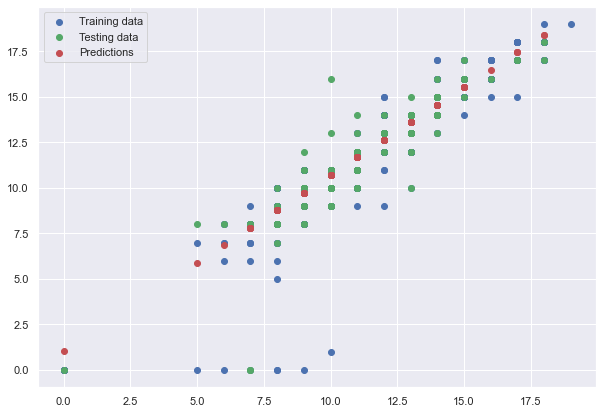

In [752]:
y_test_predNN_G2 = model.predict(X_test_G2)

plot_predictions(train_data=X_train_G2,
                 train_labels=y_train_G2,
                 test_data=X_test_G2,
                 test_labels=y_test_G2,
                 predictions=y_test_predNN_G2)

In [753]:
# Evaluate the model on the test set

mae_G2 = mae(y_test_G2, y_test_predNN_G2.squeeze()).numpy()
mse_G2 = mse(y_test_G2, y_test_predNN_G2.squeeze()).numpy()
print("Mean Squared Error - MSE (Neural Network - Test) \t:", mse_G2)
print("Mean Absolute Error - MAE (Neural Network - Test) \t:", mae_G2)

Mean Squared Error - MSE (Neural Network - Test) 	: 2.0429335
Mean Absolute Error - MAE (Neural Network - Test) 	: 0.9037877


### Conclusion:

By looking at the R^2 and MSE of each variable, G2 would be the best variable, followed by G1, absences and age in that order. 

For the other variables:'traveltime', 'studytime', 'failures', we will use a boxplot to see how well they are related to 'G3' as they are categorised from 1 to 4.